# Importações de modulos necessários

In [19]:
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler


# Aquisição dos dados

In [5]:
data = load_iris()
iris_df = pd.DataFrame(data=data.data, columns=data.feature_names)

In [ ]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


# Preparação dos dados

In [7]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


* Uma prática comum para a criação de um modelo de aprendizado de máquina é normalizar os dados para que as faixas dos dados sejam padronizadas, o quê ajuda o algoritmo de aprendizado a convergir para um solução

### Minmax scaler
Será utilizado o minmax scaler que normaliza os dados de forma que converta o espaço para uma faixa entre 0 e 1

In [10]:
scaler = MinMaxScaler()
normalized_iris_df = pd.DataFrame(data=scaler.fit_transform(iris_df), columns=[x[:x.find('(cm)')] for x in iris_df.columns])
normalized_iris_df.head()

,sepal length,sepal width,petal length,petal width
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.111111,0.500000,0.050847,0.041667
3,0.083333,0.458333,0.084746,0.041667
4,0.194444,0.666667,0.067797,0.041667


# Criação do modelo de aprendizado

## Procurando o K ideal

* Para encontrar o k ideal utilizaremos o método do cotovoleo, que encontra um número de cluster a partir de onde os dados deixam de apresentar uma redução significativa da variância dentro de cada cluster

([<matplotlib.axis.XTick at 0x285037e50>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

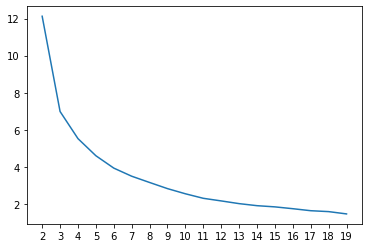

In [14]:
variance_intra_cluster = []

for k in range(2, 20):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(normalized_iris_df)
    variance_intra_cluster.append(kmeans.inertia_)

sns.lineplot(x=list(range(2, 20)), y=variance_intra_cluster)
plt.xticks(list(range(2, 20)))

In [27]:
final_df = iris_df.copy()
kmeans = KMeans(n_clusters=8)
final_df['cluster'] = kmeans.fit_predict(normalized_iris_df)

# Avaliação do modelo

In [28]:
final_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),cluster
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,7
2,4.7,3.2,1.3,0.2,7
3,4.6,3.1,1.5,0.2,7
4,5.0,3.6,1.4,0.2,0


<AxesSubplot:xlabel='sepal length (cm)', ylabel='sepal width (cm)'>

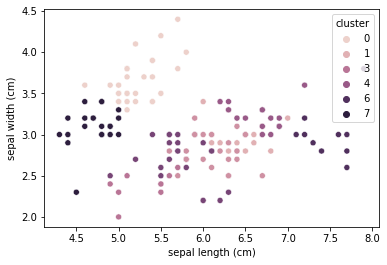

In [29]:
sns.scatterplot(data=final_df, x='sepal length (cm)', y='sepal width (cm)', hue='cluster')

## Utilização do pca

In [30]:
pca = PCA()
pca_df = pca.fit_transform(final_df.drop('cluster', axis='columns'))
pca_df = pd.DataFrame(pca_df)

In [31]:
pca_df.head()

,0,1,2,3
0,-2.684126,0.319397,-0.027915,-0.002262
1,-2.714142,-0.177001,-0.210464,-0.099027
2,-2.888991,-0.144949,0.017900,-0.019968
3,-2.745343,-0.318299,0.031559,0.075576
4,-2.728717,0.326755,0.090079,0.061259


In [32]:
px.scatter_3d(data_frame=pca_df, x=0, y=1, z=2, color=final_df['cluster'])

In [33]:
test_df = pd.read_csv('data/test_data.csv')

In [36]:
test_df.head()

,0,1,2,3
0,1.00,3.0,1.0,0.10
1,2.00,4.0,2.0,0.12
2,1.50,3.0,4.0,0.13
3,0.50,5.0,6.0,0.16
4,0.75,4.5,1.0,0.12


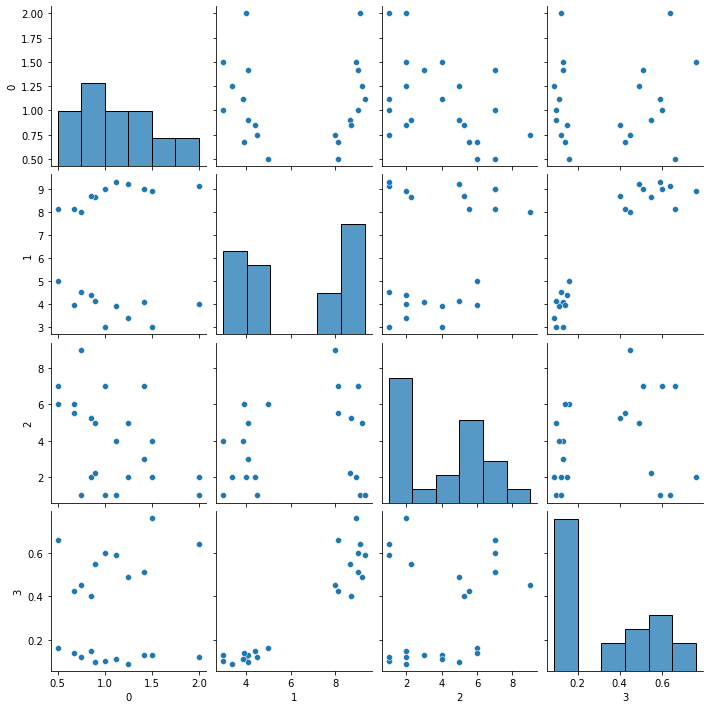

In [35]:
sns.pairplot(test_df)

In [37]:
pca = PCA()
pca_df = pd.DataFrame(pca.fit_transform(test_df))

In [38]:
pca_df.head()

,0,1,2,3
0,-4.485957,0.079452,-0.267706,0.047304
1,-3.117103,0.057732,0.789430,-0.045583
2,-2.552747,-2.140335,0.497355,0.076062
3,0.300634,-2.435373,-0.374584,-0.032528
4,-3.340816,1.031598,-0.557376,-0.057857


In [39]:
px.scatter_3d(pca_df, 0, 1, 2)

In [40]:
import random

In [86]:
centros = [[0, 0, 0, 0], [5, 0, 0, 3], [2.5, 2, 1.5, 0]]
columns = [0, 1, 2, 3]
data = []
    
for row in range(250):
    data.append([])
    data[row] = [x + random.gauss(x, 2) for x in centros[random.randint(0, 2)]]


In [87]:
df = pd.DataFrame(data, columns=columns)

In [91]:
df.to_csv('./data/example_data.csv', index=None)

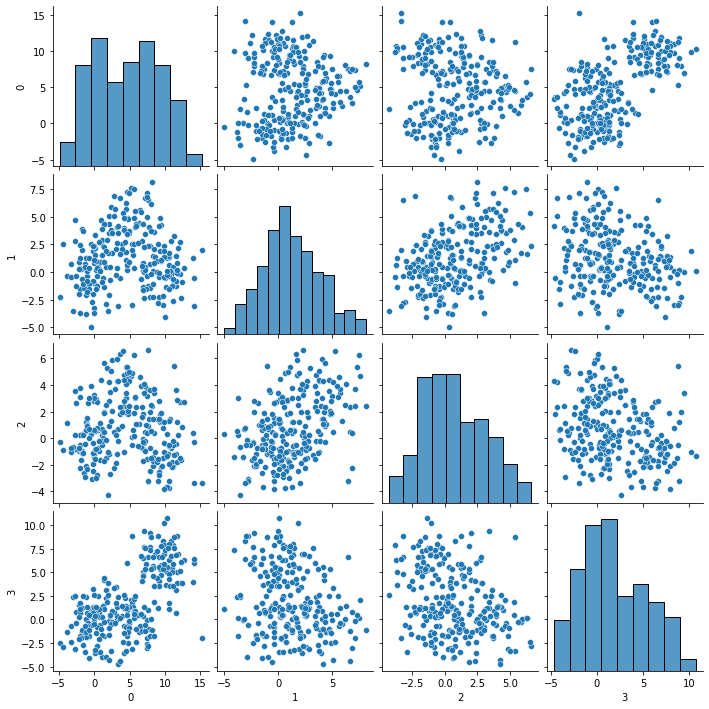

In [88]:
sns.pairplot(df)

In [89]:
pca = PCA()
pca_df = pd.DataFrame(pca.fit_transform(df))

<AxesSubplot:xlabel='0', ylabel='1'>

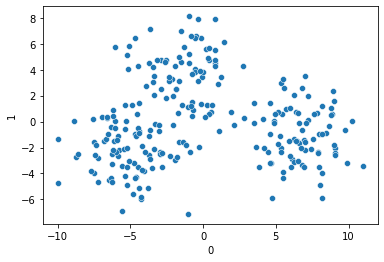

In [92]:
sns.scatterplot(data=pca_df, x=0, y=1)

In [90]:
px.scatter_3d(pca_df, 0, 1, 2)

<AxesSubplot:ylabel='Count'>

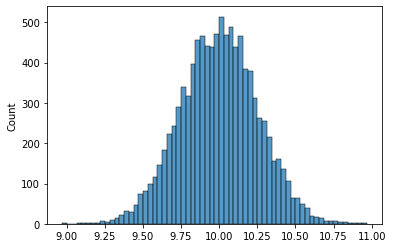

In [54]:
sns.histplot([random.gauss(10, 0.25) for _ in range(1, 10000)])